<a href="https://colab.research.google.com/github/jembi/mpi-toolkit-notebook/blob/main/data-generator/GECO-Kenya/Generate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

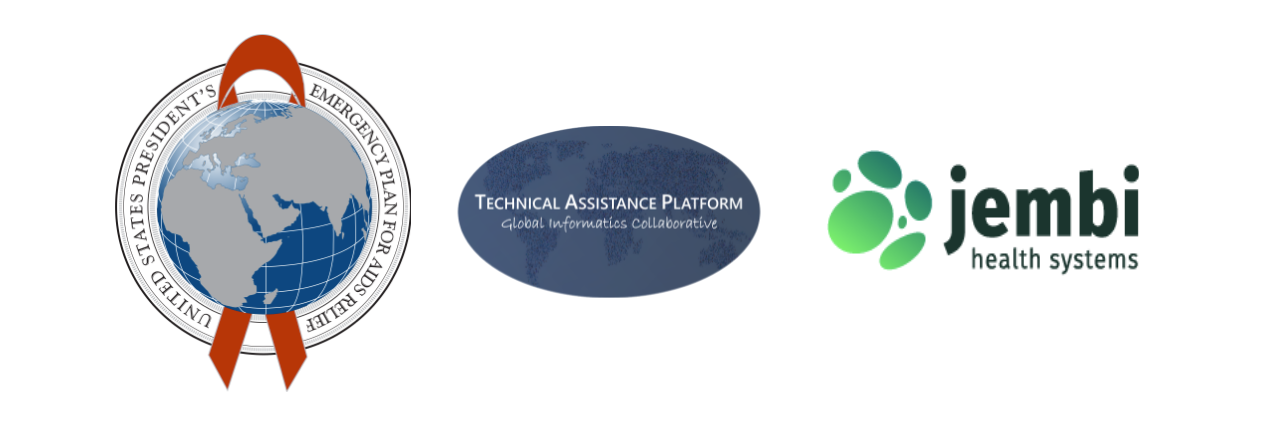

📝 <font color="red">NOTE: Please do not execute a run all command.

#**<font color="#007f68">Dataset Generator**

Research and development of novel techniques in areas such as data mining and record linkage commonly require real-world data for testing and evaluation of the accuracy, efficiency and effectiveness of these techniques. In areas and applications where the data include personal information, it is often difficult to acquire real data due to privacy and confidentiality concerns [2].

An alternative to using real data is to generate synthetic (or artificial) data which is based on real data [1, 5]. Such gen- erated data should exhibit similar statistical characteristics compared to the real data they are based on. For example, the generated values, their frequency distributions, and the occurrences and frequencies of typographical and other errors and variations should follow real data. Dependencies between elements of real data should also be modelled.

The methodological advantages of synthetic data are that [1, 5] (a) they can be generated with well defined frequency distributions, error characteristics and variations; (b) the status of which records have been generated based on each other is known, allowing for example to measure the accuracy of matching records when synthetic data are used for record linkage (generally not possible on real data because true matches are unknown); and (c) the generated data, as well as the generator program itself, can be published.

This section is optional, you can edit varibales to alter the output of the data-generator.

## <font color="#007f68">Links to other MPI-toolkit Notebooks:
[Directory](https://colab.research.google.com/drive/1TqQ5sklvhw8I1f5m49ob-WTFfBtiElfs#scrollTo=M5NmyYErfDvt)

[Blocking](https://colab.research.google.com/drive/1fB6pa8Xu1cMdf1VmnTZ7bn5j-TS_ccRO#scrollTo=cbBPp8a-1ou5&forceEdit=true&sandboxMode=true)

[Fastlink R Linking](https://colab.research.google.com/drive/198Du0EOpaFODRmgLoIV_9a7XYYV2Um-u#scrollTo=isUSuVAs37Al)

[Fastlink R Deduplication Notebook](https://colab.research.google.com/drive/1xaItzOzYrv89OgI4VwXGhgIOn17lNhrQ)


## **<font color="#007f68">1) Notebook setup**

In [ ]:
#@title <font color="#18CF68">Clone the github Data Generator Repo from Github
!git clone https://github.com/jembi/mpi-toolkit-notebook.git

Cloning into 'mpi-toolkit-notebook'...
remote: Enumerating objects: 346, done.
remote: Counting objects: 100% (346/346), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 346 (delta 161), reused 83 (delta 26), pack-reused 0
Receiving objects: 100% (346/346), 1.55 MiB | 6.71 MiB/s, done.
Resolving deltas: 100% (161/161), done.


In [ ]:
#@title <font color="#18CF68"> Initial imports
import pandas as pd
import os
import sys
import shutil
import ipywidgets as widgets
from PIL import Image
from google.colab import files
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Dropdown, Button, FloatSlider, IntSlider, IntText, FloatText
%load_ext google.colab.data_table

In [ ]:
#@title <font color="#18CF68"> Set up Variables

#Probability Distribution for Attributes
given_name_val= 0.3
family_name_val= 0.1
gender_val=0.2
dob_val=0.1
city_val=0.1
pn_val=0.1
nid_val=0.1

# Data Generator parameters 
max_duplicate_per_record =  2 

num_duplicates_distribution = 'zipf' 

max_modification_per_attr = 1 

num_modification_per_record = 4 

#Given Name Corruptor

missing_val_FN = 0.1 
name_misspell_FN = 0.1 
edit_FN = 0.1 
ocr_FN = 0.1 
keyboard_FN = 0.1 
phonetic_FN = 0.5 

#Family Name Corruptor

missing_val_LN = 0.1 
name_misspell_LN = 0.1 
edit_LN = 0.1 
ocr_LN = 0.1 
keyboard_LN = 0.1 
phonetic_LN = 0.5 

#Gender at Birth Corruptor

missing_val_GAB = 0.2 
ocr_GAB = 0.4 
keyboard_GAB = 0.4

#Date of Birth Corruptor

missing_val_DOB = 0.5 
keyboard_DOB = 0.5 

#City Corruptor

missing_val_C = 0.2 
edit_C = 0.4 
phonetic_C = 0.4 


#Phone Number Corruptor

missing_val_PN = 0.2 
edit_PN = 0.4 
keyboard_PN = 0.4

#National ID Corruptor

missing_val_NID = 0.4 
ocr_NID = 0.2 
keyboard_NID = 0.4 

number_of_originals =  1000 
number_of_duplicates =  500



### <font color="#007f68"> Download Manual [OPTIONAL]

In [ ]:
#@title <font color="#18CF68"> Download Manual
files.download("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/flex-data-gen-manual.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### <font color="#007f68"> Mount your own google drive [OPTIONAL]

This step is optional, you can mount your own google drive so that the generated dataset can be saved there.

Follow the link to get authorisation code.

In [ ]:
#@title <font color="#18CF68"> Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **<font color="#007f68">2) Modify Variables [OPTIONAL]**

This section is optional, you can edit varibales to alter the output of the data-generator.

### <font color="#007f68"> Set Up Variables

Change values below to your desired position and then click the Update button to set changes.

To reset the values to the default click the Reset button.

**Max duplicate per record (MDPR)**

**Duplicates Distribution (DD)**

**Max modification per attr (MMPA)**

**Number of modifications per record (NMPR)**

In [ ]:
#@title <font color="#18CF68">Data Generator Parameters


max_duplicate_per_record =  2 

num_duplicates_distribution = 'zipf' 

max_modification_per_attr = 1 

num_modification_per_record = 4 

max_duplicate_per_record_slider = IntSlider(description="MDPR", value=max_duplicate_per_record, min=1, max=10, step=1, disabled=False)

num_duplicates_distribution_drop = Dropdown(description="DD", value=num_duplicates_distribution, options=["zipf", "poisson", "uniform"], disabled=False)

max_modification_per_attr_slider = IntSlider(description="MMPA", value=max_modification_per_attr, min=1, max=10, step=1, disabled=False)

num_modification_per_record_slider = IntSlider(description="NMPR", value=num_modification_per_record, min=1, max=7, step=1, disabled=False)

reset_button = Button(description="Reset", disabled=False)
def default_values(*args):

    # set values to default
    global max_duplicate_per_record 
    global num_duplicates_distribution 
    global max_modification_per_attr 
    global num_modification_per_record 
    max_duplicate_per_record =  2 
    num_duplicates_distribution = 'zipf' 
    max_modification_per_attr = 1 
    num_modification_per_record = 4 
    max_duplicate_per_record_slider.value =  2 
    num_duplicates_distribution_drop.value = 'zipf' 
    max_modification_per_attr_slider.value = 1 
    num_modification_per_record_slider.value = 4 

    print("Your choices are:\n{} max duplicates per record \n{} duplicate distribution \n{} max modifications per attributes and \n{} max modifications per record.".format(max_duplicate_per_record_slider.value , num_duplicates_distribution_drop.value, max_modification_per_attr_slider.value, num_modification_per_record_slider.value))


reset_button.on_click(default_values)

update_button = Button(description="Update", disabled=False)
def update_values(*args):
    if num_modification_per_record_slider.value >= max_modification_per_attr_slider.value:
        # set values to default
        global max_duplicate_per_record 
        global num_duplicates_distribution 
        global max_modification_per_attr 
        global num_modification_per_record
        max_duplicate_per_record =  max_duplicate_per_record_slider.value
        num_duplicates_distribution = num_duplicates_distribution_drop.value
        max_modification_per_attr = max_modification_per_attr_slider.value
        num_modification_per_record = num_modification_per_record_slider.value

        print("Your choices are:\n{} max duplicates per record \n{} duplicate distribution \n{} max modifications per attributes and \n{} max modifications per record.".format(max_duplicate_per_record_slider.value , num_duplicates_distribution_drop.value, max_modification_per_attr_slider.value, num_modification_per_record_slider.value))
    else:
        print("Failed to update: Number of modifications per record must be greater than or equal to maximum number of modifications per attribute")

update_button.on_click(update_values)


VBox([max_duplicate_per_record_slider, num_duplicates_distribution_drop, max_modification_per_attr_slider, num_modification_per_record_slider, update_button, reset_button])

Set how many original and how many duplicate records are to be generated. 

*This is optimised when the number of duplicates is half or less of the number of originals.*

In [ ]:
#@title <font color="#18CF68">Records

number_of_originals =  1000 
number_of_duplicates =  500

number_of_originals_slider = IntSlider(description="Originals", value=number_of_originals, min=1, max=30000, step=50, disabled=False)
number_of_duplicates_slider = IntSlider(description="Duplicates", value=number_of_duplicates, min=0, max=(number_of_originals_slider.value*max_duplicate_per_record_slider.value), step=25, disabled=False)


reset_button = Button(description="Reset", disabled=False)

def check_max_dup(*args):
    global max_duplicate_per_record
    if(number_of_originals_slider.value==0):
        max_bool=True
        print("Originals cannot be zero")
    else:
        x = (number_of_duplicates_slider.value/number_of_originals_slider.value)
        if(x > max_duplicate_per_record):
            print("Maximum Duplicates Exceeded")
            max_bool = True
        else:
            max_bool = False

    update_button.disabled=max_bool


def update_duplicate_slider(*args):

    number_of_duplicates_slider.max=(number_of_originals_slider.value*max_duplicate_per_record_slider.value)



def default_values(*args):

    # set values to default
    global number_of_originals
    global number_of_duplicates
    number_of_originals =  1000 
    number_of_duplicates =  500
    number_of_originals_slider.value  =  1000 
    number_of_duplicates_slider.value  =  500
    print("Reset")

    #print(number_of_originals, number_of_duplicates)


reset_button.on_click(default_values)

update_button = Button(description="Update", disabled=False)

def update_values(*args):

    # set values to default
    global number_of_originals
    global number_of_duplicates
    number_of_originals =  number_of_originals_slider.value
    number_of_duplicates = number_of_duplicates_slider.value
    print("Updated")
    #print(number_of_originals, number_of_duplicates)

update_button.on_click(update_values)
number_of_originals_slider.observe(update_duplicate_slider, 'value')

#number_of_duplicates_slider.observe(check_max_dup, 'value')    # just removing this, duplicate_slider will always be limited to the number of duplicates allowed

VBox([number_of_originals_slider, number_of_duplicates_slider, update_button, reset_button])

Define the probability distribution of how likely an attribute will be selected for a modification.

Each of the given probability values must be between 0 and 1, and the sum of them must be 1.0 otherwise "Update" button will. not work.

If a probability is set to 0 for a certain attribute, then no modification will be applied on this attribute.

Change values below to your desired position and then click the Update button to set changes.

To reset the values to the default click the Reset button.

In [ ]:
#@title <font color="#18CF68">Modification probability distribution
# establish important values for later use
given_name_val= 0.3
family_name_val= 0.1
gender_val=0.2
dob_val=0.1
city_val=0.1
pn_val=0.1
nid_val=0.1

# create the 6 individual sliders
given_name_val_slider = FloatSlider(description="Given Name", value=given_name_val, min=0, max=1, step=0.01)
family_name_val_slider = FloatSlider(description="Family Name", value=family_name_val, min=0, max=1, step=0.01)
gender_val_slider = FloatSlider(description="Gender", value=gender_val, min=0, max=1, step=0.01)
dob_val_slider = FloatSlider(description="Date of Birth", value=dob_val, min=0, max=1, step=0.01)
city_val_slider = FloatSlider(description="City", value=city_val, min=0, max=1, step=0.01)
pn_val_slider = FloatSlider(description="Phone Number", value=pn_val, min=0, max=1, step=0.01)
nid_val_slider = FloatSlider(description="National ID", value=nid_val, min=0, max=1, step=0.01)

# total
col_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
col_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((col_total_slider, 'value'), (col_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
update_button = Button(description="Update", disabled=False)
reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = round((given_name_val_slider.value + family_name_val_slider.value + gender_val_slider.value + dob_val_slider.value + city_val_slider.value + pn_val_slider.value + nid_val_slider.value), 2)
    col_total_slider.value=total
    total_bool = (total != 1)
    update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global given_name_val
    global family_name_val
    global gender_val
    global dob_val
    global city_val
    global pn_val
    global nid_val
    given_name_val= 0.22
    family_name_val= 0.16
    gender_val=0.08
    dob_val=0.19
    city_val=0.09
    pn_val=0.07
    nid_val=0.19
    given_name_val_slider.value = given_name_val
    family_name_val_slider.value = family_name_val
    gender_val_slider.value = gender_val
    dob_val_slider.value = dob_val
    city_val_slider.value = city_val
    pn_val_slider.value = pn_val 
    nid_val_slider.value = nid_val
    print("Reset")

    #print(given_name_val, family_name_val, gender_val, dob_val, city_val, pn_val, nid_val)

#reset values when clickd
reset_button.on_click(default_values)


def num_mod():
    global num_modification_per_record

    non_zero_count = 0

    for item in [given_name_val_slider.value, family_name_val_slider.value, gender_val_slider.value, 
      dob_val_slider.value, city_val_slider.value, pn_val_slider.value, nid_val_slider.value]:
      if item > 0:
          non_zero_count += 1

    return num_modification_per_record <= non_zero_count


def update_values(*args):
    if num_mod():
        # update the values
        global given_name_val
        global family_name_val
        global gender_val
        global dob_val
        global city_val
        global pn_val
        global nid_val
        given_name_val = given_name_val_slider.value
        family_name_val = family_name_val_slider.value
        gender_val = gender_val_slider.value
        dob_val = dob_val_slider.value
        city_val = city_val_slider.value
        pn_val = pn_val_slider.value
        nid_val = nid_val_slider.value
        print("Updated")

        #print(given_name_val, family_name_val, gender_val, dob_val, city_val, pn_val, nid_val)
    else:
        print("Failed to update: Number of modifications per record ({}) require more attributes to be non-zero".format(num_modification_per_record))


# when slider or button is interacted with
update_button.on_click(update_values)

given_name_val_slider.observe(check_sum, 'value')
family_name_val_slider.observe(check_sum, 'value')
gender_val_slider.observe(check_sum, 'value')
dob_val_slider.observe(check_sum, 'value')
city_val_slider.observe(check_sum, 'value')
pn_val_slider.observe(check_sum, 'value')
nid_val_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider
VBox([given_name_val_slider, family_name_val_slider, gender_val_slider, 
      dob_val_slider, city_val_slider, pn_val_slider, nid_val_slider, 
      col_total_box, 
      update_button, reset_button])

### <font color="#007f68"> Corruptors

Define the actual corruption (modification) methods that will be applied on the different attributes, then click the "Update" button to set changes.  

For each attribute, the sum of probabilities given must sum to 1.0 otherwise the "Update" button will not work. 

To reset the values to the default click the Reset button.

Types of errors:

**Missing Value (MV) - Empty identifiers.**

**Name Misspell (NM)- Example - use of nicknames instead of real names.**

**Edit - Wrong use of special characters and spaces**

**Optical Character Recognition (OCR) - The use of scanners to capture data often introduces errors.**

**Keyboard - transposition of keys and characters**

**Phonetic - Spelling errors when entering names because of phonetic interpretations.**

In [ ]:
#@title <font color="#18CF68">Given Name Corruptor

# establish important values for later use
missing_val_FN, name_misspell_FN, edit_FN, ocr_FN, keyboard_FN, phonetic_FN = 0.1, 0.1, 0.2, 0.1, 0.2, 0.3

# create the 6 individual sliders
missing_val_FN_slider = FloatSlider(description="MV", value=missing_val_FN, min=0, max=1, step=0.01)
name_misspell_FN_slider = FloatSlider(description="NM", value=name_misspell_FN, min=0, max=1, step=0.01)
edit_FN_slider = FloatSlider(description="Edit", value=edit_FN, min=0, max=1, step=0.01)
ocr_FN_slider = FloatSlider(description="OCR", value=ocr_FN, min=0, max=1, step=0.01)
keyboard_FN_slider = FloatSlider(description="Keyboard", value=keyboard_FN, min=0, max=1, step=0.01)
phonetic_FN_slider = FloatSlider(description="Phonetic", value=phonetic_FN, min=0, max=1, step=0.01)

# total
name_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
name_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((name_total_slider, 'value'), (name_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
name_update_button = Button(description="Update", disabled=False)
name_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = (missing_val_FN_slider.value + name_misspell_FN_slider.value + 
             edit_FN_slider.value + ocr_FN_slider.value + 
             keyboard_FN_slider.value + phonetic_FN_slider.value)
    name_total_slider.value=total
    total_bool = (total != 1)
    name_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_FN 
    global name_misspell_FN
    global edit_FN
    global ocr_FN
    global keyboard_FN
    global phonetic_FN
    missing_val_FN, name_misspell_FN, edit_FN, ocr_FN, keyboard_FN, phonetic_FN = 0.1, 0.1, 0.2, 0.1, 0.2, 0.3
    missing_val_FN_slider.value = missing_val_FN 
    name_misspell_FN_slider.value = name_misspell_FN 
    edit_FN_slider.value = edit_FN  
    ocr_FN_slider.value = ocr_FN  
    keyboard_FN_slider.value = keyboard_FN  
    phonetic_FN_slider.value = phonetic_FN 
    print("Reset")

    #print(missing_val_FN, name_misspell_FN, edit_FN, ocr_FN, keyboard_FN, phonetic_FN)

#reset values when clickd
name_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_FN 
    global name_misspell_FN
    global edit_FN
    global ocr_FN
    global keyboard_FN
    global phonetic_FN
    missing_val_FN = missing_val_FN_slider.value
    name_misspell_FN = name_misspell_FN_slider.value
    edit_FN = edit_FN_slider.value
    ocr_FN = ocr_FN_slider.value
    keyboard_FN = keyboard_FN_slider.value
    phonetic_FN = phonetic_FN_slider.value
    print("Updated")
    #print(missing_val_FN, name_misspell_FN, edit_FN, ocr_FN, keyboard_FN, phonetic_FN)

# when slider or button is interacted with
name_update_button.on_click(update_values)

missing_val_FN_slider.observe(check_sum, 'value')
name_misspell_FN_slider.observe(check_sum, 'value')
edit_FN_slider.observe(check_sum, 'value')
ocr_FN_slider.observe(check_sum, 'value')
keyboard_FN_slider.observe(check_sum, 'value')
phonetic_FN_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider
VBox([missing_val_FN_slider, name_misspell_FN_slider, edit_FN_slider, 
      ocr_FN_slider, keyboard_FN_slider, phonetic_FN_slider, 
      name_total_box, 
      name_update_button, name_reset_button])

In [ ]:
#@title <font color="#18CF68">Family Name Corruptor


# establish important values for later use
missing_val_LN, name_misspell_LN, edit_LN, ocr_LN, keyboard_LN, phonetic_LN = 0.1, 0.1, 0.2, 0.1, 0.2, 0.3

# create the 6 individual sliders
missing_val_LN_slider = FloatSlider(description="MV", value=missing_val_LN, min=0, max=1, step=0.01)
name_misspell_LN_slider = FloatSlider(description="NM", value=name_misspell_LN, min=0, max=1, step=0.01)
edit_LN_slider = FloatSlider(description="Edit", value=edit_LN, min=0, max=1, step=0.01)
ocr_LN_slider = FloatSlider(description="OCR", value=ocr_LN, min=0, max=1, step=0.01)
keyboard_LN_slider = FloatSlider(description="Keyboard", value=keyboard_LN, min=0, max=1, step=0.01)
phonetic_LN_slider = FloatSlider(description="Phonetic", value=phonetic_LN, min=0, max=1, step=0.01)

# total
family_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
family_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((family_total_slider, 'value'), (family_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
family_update_button = Button(description="Update", disabled=False)
family_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = (missing_val_LN_slider.value + name_misspell_LN_slider.value + 
             edit_LN_slider.value + ocr_LN_slider.value + 
             keyboard_LN_slider.value + phonetic_LN_slider.value)
    family_total_slider.value=total
    total_bool = (total != 1)
    family_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_LN 
    global name_misspell_LN
    global edit_LN
    global ocr_LN
    global keyboard_LN
    global phonetic_LN
    missing_val_LN, name_misspell_LN, edit_LN, ocr_LN, keyboard_LN, phonetic_LN = 0.1, 0.1, 0.2, 0.1, 0.2, 0.3
    missing_val_LN_slider.value = missing_val_LN 
    name_misspell_LN_slider.value = name_misspell_LN 
    edit_LN_slider.value = edit_LN  
    ocr_LN_slider.value = ocr_LN  
    keyboard_LN_slider.value = keyboard_LN  
    phonetic_LN_slider.value = phonetic_LN  
    print("Reset")
    #print(missing_val_LN, name_misspell_LN, edit_LN, ocr_LN, keyboard_LN, phonetic_LN)

#reset values when clickd
family_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_LN 
    global name_misspell_LN
    global edit_LN
    global ocr_LN
    global keyboard_LN
    global phonetic_LN
    missing_val_LN = missing_val_LN_slider.value
    name_misspell_LN = name_misspell_LN_slider.value
    edit_LN = edit_LN_slider.value
    ocr_LN = ocr_LN_slider.value
    keyboard_LN = keyboard_LN_slider.value
    phonetic_LN = phonetic_LN_slider.value
    print("Updated")

    #print(missing_val_LN, name_misspell_LN, edit_LN, ocr_LN, keyboard_LN, phonetic_LN)

# when slider or button is interacted with
family_update_button.on_click(update_values)

missing_val_LN_slider.observe(check_sum, 'value')
name_misspell_LN_slider.observe(check_sum, 'value')
edit_LN_slider.observe(check_sum, 'value')
ocr_LN_slider.observe(check_sum, 'value')
keyboard_LN_slider.observe(check_sum, 'value')
phonetic_LN_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider
VBox([missing_val_LN_slider, name_misspell_LN_slider, edit_LN_slider, 
      ocr_LN_slider, keyboard_LN_slider, phonetic_LN_slider, family_total_box,
      family_update_button, family_reset_button])

In [ ]:
#@title <font color="#18CF68">Gender at Birth Corruptor

# establish important values for later use
missing_val_GAB = 0.2 
ocr_GAB = 0.4 
keyboard_GAB = 0.4


# create the 6 individual sliders
missing_val_GAB_slider = FloatSlider(description="MV", value=missing_val_GAB, min=0, max=1, step=0.01)
ocr_GAB_slider = FloatSlider(description="Edit", value=ocr_GAB, min=0, max=1, step=0.01)
keyboard_GAB_slider = FloatSlider(description="Keyboard", value=keyboard_GAB, min=0, max=1, step=0.01)

# total
gob_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
gob_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((gob_total_slider, 'value'), (gob_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
gob_update_button = Button(description="Update", disabled=False)
gob_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = (missing_val_GAB_slider.value + ocr_GAB_slider.value + 
             keyboard_GAB_slider.value)
    gob_total_slider.value=total
    total_bool = (total != 1)
    gob_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_GAB 
    global ocr_GAB 
    global keyboard_GAB 
    missing_val_GAB = 0.2 
    ocr_GAB = 0.4 
    keyboard_GAB = 0.4
    missing_val_GAB_slider.value = missing_val_GAB 
    ocr_GAB_slider.value = ocr_GAB  
    keyboard_GAB_slider.value = keyboard_GAB  
    print("Reset")

    #print(missing_val_GAB, ocr_GAB, keyboard_GAB)

#reset values when clickd
gob_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_GAB 
    global ocr_GAB 
    global keyboard_GAB 
    missing_val_GAB = missing_val_GAB_slider.value
    ocr_GAB = ocr_GAB_slider.value
    keyboard_GAB = keyboard_GAB_slider.value
    print("Updated")

    #print(missing_val_GAB, ocr_GAB, keyboard_GAB)

# when slider or button is interacted with
gob_update_button.on_click(update_values)

missing_val_GAB_slider.observe(check_sum, 'value')
ocr_GAB_slider.observe(check_sum, 'value')
keyboard_GAB_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider
VBox([missing_val_GAB_slider, ocr_GAB_slider, keyboard_GAB_slider, gob_total_box,
      gob_update_button, gob_reset_button])

In [ ]:
#@title <font color="#18CF68">Date of Birth

# establish important values for later use

missing_val_DOB = 0.5 
keyboard_DOB = 0.5 

# create the 6 individual sliders
missing_val_DOB_slider = FloatSlider(description="MV", value=missing_val_DOB, min=0, max=1, step=0.01)
keyboard_DOB_slider = FloatSlider(description="Keyboard", value=keyboard_DOB, min=0, max=1, step=0.01)

# total
dob_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
dob_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((dob_total_slider, 'value'), (dob_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
dob_update_button = Button(description="Update", disabled=False)
dob_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = (missing_val_DOB_slider.value + keyboard_DOB_slider.value)
    dob_total_slider.value=total
    total_bool = (total != 1)
    dob_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_DOB
    global keyboard_DOB 
    missing_val_DOB = 0.5 
    keyboard_DOB = 0.5 
    missing_val_DOB_slider.value = missing_val_DOB
    keyboard_DOB_slider.value = keyboard_DOB 
    print("Reset")

    #print(missing_val_DOB, keyboard_DOB)

#reset values when clickd
dob_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_DOB
    global keyboard_DOB 
    missing_val_DOB = missing_val_DOB_slider.value
    keyboard_DOB = keyboard_DOB_slider.value
    print("Reset")

    #print(missing_val_DOB, keyboard_DOB)

# when slider or button is interacted with
dob_update_button.on_click(update_values)

missing_val_DOB_slider.observe(check_sum, 'value')
keyboard_DOB_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider
VBox([missing_val_DOB_slider, keyboard_DOB_slider, dob_total_box,
      dob_update_button, dob_reset_button])

In [ ]:
#@title <font color="#18CF68">City Corruptor

# establish important values for later use
missing_val_C = 0.2 
edit_C = 0.4 
phonetic_C = 0.4 


# create the 6 individual sliders
missing_val_C_slider = FloatSlider(description="MV", value=missing_val_C, min=0, max=1, step=0.01)
edit_C_slider = FloatSlider(description="Edit", value=edit_C, min=0, max=1, step=0.01)
phonetic_C_slider = FloatSlider(description="Phonetic", value=phonetic_C, min=0, max=1, step=0.01)

# total
city_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
city_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((city_total_slider, 'value'), (city_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
city_update_button = Button(description="Update", disabled=False)
city_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = (missing_val_C_slider.value + edit_C_slider.value + 
             phonetic_C_slider.value)
    city_total_slider.value=total
    total_bool = (total != 1)
    city_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_C 
    global edit_C 
    global phonetic_C
    missing_val_C = 0.2 
    edit_C = 0.4 
    phonetic_C = 0.4
    missing_val_C_slider.value = missing_val_C 
    edit_C_slider.value = edit_C  
    phonetic_C_slider.value = phonetic_C  
    print("Reset")

    #print(missing_val_C, edit_C, phonetic_C)

#reset values when clickd
city_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_C 
    global edit_C 
    global phonetic_C
    missing_val_C = missing_val_C_slider.value
    edit_C = edit_C_slider.value
    phonetic_C = phonetic_C_slider.value
    print("Updated")

    #print(missing_val_C, edit_C, phonetic_C)

# when slider or button is interacted with
city_update_button.on_click(update_values)

missing_val_C_slider.observe(check_sum, 'value')
edit_C_slider.observe(check_sum, 'value')
phonetic_C_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider
VBox([missing_val_C_slider, edit_C_slider, phonetic_C_slider, city_total_box,
      city_update_button, city_reset_button])

In [ ]:
#@title <font color="#18CF68">Phone Number Corruptor

# establish important values for later use
missing_val_PN = 0.2 
edit_PN = 0.4 
keyboard_PN = 0.4


# create the 6 individual sliders
missing_val_PN_slider = FloatSlider(description="MV", value=missing_val_PN, min=0, max=1, step=0.01)
edit_PN_slider = FloatSlider(description="Edit", value=edit_PN, min=0, max=1, step=0.01)
keyboard_PN_slider = FloatSlider(description="Keyboard", value=keyboard_PN, min=0, max=1, step=0.01)

# total
phone_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
phone_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((phone_total_slider, 'value'), (phone_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
phone_update_button = Button(description="Update", disabled=False)
phone_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = (missing_val_PN_slider.value + edit_PN_slider.value + 
             keyboard_PN_slider.value)
    phone_total_slider.value=total
    total_bool = (total != 1)
    phone_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_PN 
    global edit_PN
    global keyboard_PN
    missing_val_PN = 0.2 
    edit_PN = 0.4 
    keyboard_PN = 0.4
    missing_val_PN_slider.value = missing_val_PN 
    edit_PN_slider.value = edit_PN  
    keyboard_PN_slider.value = keyboard_PN  
    print("Reset")

    #print(missing_val_PN, edit_PN, keyboard_PN)

#reset values when clickd
phone_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_PN 
    global edit_PN
    global keyboard_PN
    missing_val_PN = missing_val_PN_slider.value
    edit_PN = edit_PN_slider.value
    keyboard_PN = keyboard_PN_slider.value
    print("Updated")

    #print(missing_val_PN, edit_PN, keyboard_PN)

# when slider or button is interacted with
phone_update_button.on_click(update_values)

missing_val_PN_slider.observe(check_sum, 'value')
edit_PN_slider.observe(check_sum, 'value')
keyboard_PN_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider
VBox([missing_val_PN_slider, edit_PN_slider, keyboard_PN_slider, phone_total_box,
      phone_update_button, phone_reset_button])

In [ ]:
#@title <font color="#18CF68">National ID

# establish important values for later use
missing_val_NID = 0.4 
ocr_NID = 0.2 
keyboard_NID = 0.4


# create the 6 individual sliders
missing_val_NID_slider = FloatSlider(description="MV", value=missing_val_NID, min=0, max=1, step=0.01)
ocr_NID_slider = FloatSlider(description="Edit", value=ocr_NID, min=0, max=1, step=0.01)
keyboard_NID_slider = FloatSlider(description="Keyboard", value=keyboard_NID, min=0, max=1, step=0.01)

# total
id_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
id_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((id_total_slider, 'value'), (id_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
id_update_button = Button(description="Update", disabled=False)
id_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = (missing_val_NID_slider.value + ocr_NID_slider.value + 
             keyboard_NID_slider.value)
    id_total_slider.value=total
    total_bool = (total != 1)
    id_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_NID
    global ocr_NID 
    global keyboard_NID
    missing_val_NID = 0.2 
    ocr_NID = 0.4 
    keyboard_NID = 0.4
    missing_val_NID_slider.value = missing_val_NID 
    ocr_NID_slider.value = ocr_NID  
    keyboard_NID_slider.value = keyboard_NID 
    print("Reset")

    #print(missing_val_NID, ocr_NID, keyboard_NID)

#reset values when clickd
id_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_NID
    global ocr_NID 
    global keyboard_NID
    missing_val_NID = missing_val_NID_slider.value
    ocr_NID = ocr_NID_slider.value
    keyboard_NID = keyboard_NID_slider.value
    print("Updated")

    #print(missing_val_NID, ocr_NID, keyboard_NID)

# when slider or button is interacted with
id_update_button.on_click(update_values)

missing_val_NID_slider.observe(check_sum, 'value')
ocr_NID_slider.observe(check_sum, 'value')
keyboard_NID_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider
VBox([missing_val_NID_slider, ocr_NID_slider, keyboard_NID_slider, id_total_box,
      id_update_button, id_reset_button])

## **<font color="#007f68">3) Data Generation Configuration [OPTIONAL]**

This section is optional, you can view, download and update Frequency Distribution Files.

###<font color="#007f68">View Frequency Distribution Files



This sections allows you to view the current lookup tables and replace then with your own csv files

In [ ]:
#@title <font color="#18CF68">Display City Frequency
city_freq =pd.read_csv("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/city-freq.csv", header=None)
display(city_freq)

In [ ]:
#@title <font color="#18CF68">Display Given Name & Gender Frequency
name_freq =pd.read_csv("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/given-name-gender-freq.csv", header=None)
display(name_freq) 

In [ ]:
#@title <font color="#18CF68">Display Family Name Frequency
name_m_freq =pd.read_csv("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/family-name-freq.csv", header=None)
display(name_m_freq) 

###<font color="#007f68"> Download Frequency Distribution Files

In [ ]:
#@title <font color="#18CF68">Download City Frequency file
files.download("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/city-freq.csv") 

In [ ]:
#@title <font color="#18CF68">Download Given Name Frequency file
files.download("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/given-name-gender-freq.csv") 

In [ ]:
#@title <font color="#18CF68">Download Family Name Frequency file
files.download("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/family-name-freq.csv") 

###<font color="#007f68"> Update Frequency Distribution Files
⚠️ <font color="red">*WARNING! DO NOT RUN IF YOU ARE NOT CHANGING CSV FILES* ⚠️  

Upload the frequency CSV files you want to use. This will replace the original files with the ones you upload.

    The format of the City Name Frequency file is:
     # Comment lines start with the # character
     (Repeated city names will cause errors)

     The look-up file is a comma separated values (CSV) file which contains
     one type of row:
     Example:
      City_1,70
      City_2,10
      City_3,5
      City_4,10
      City_5,5
      ...


In [ ]:
#@title <font color="#18CF68">Upload City Name Frequency file
uploadCF = files.upload()

x =uploadCF.keys()
y = str(x)
z=y.strip("dict_keys([").strip("])").strip("'")

os.rename(z , "/content/city-freq.csv")

! rm "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/city-freq.csv"

shutil.move("/content/city-freq.csv", "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files")

     The format of the Given Name & Gender Frequency file is:
     # Comment lines start with the # character
     (Repeated female or male names will cause errors)

     Example:
      F_Name_1,8,female,1
      F_Name_2,7,female,1
      F_Name_3,7,female,1
      F_Name_4,7,female,1
      F_Name_5,6,female,1
      ...
      M_Name_1,26,male,1
      M_Name_2,26,male,1
      M_Name_3,23,male,1
      M_Name_4,21,male,1
      ...

In [ ]:
#@title <font color="#18CF68">Upload Given Name & Gender Frequency file
uploadFN = files.upload()

x =uploadFN.keys()
y = str(x)
z=y.strip("dict_keys([").strip("])").strip("'")

os.rename(z , "/content/given-name-gender-freq.csv")

! rm "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/given-name-gender-freq.csv"

shutil.move("/content/given-name-gender-freq.csv", "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files")

    The format of the Family Name Frequency file is:
     # Comment lines start with the # character
     (Repeated family names will cause errors)

     The look-up file is a comma separated values (CSV) file which contains
     one type of row:
     Example:
      Family_Name_1,26
      Family_Name_2,26
      Family_Name_3,23
      Family_Name_4,21
      Family_Name_5,20

      ...


In [ ]:
#@title <font color="#18CF68">Upload Family Name Frequency file
uploadLN = files.upload()

x =uploadLN.keys()
y = str(x)
z=y.strip("dict_keys([").strip("])").strip("'")

os.rename(z , "/content/family-name-freq.csv")

! rm "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/family-name-freq.csv"

shutil.move("/content/family-name-freq.csv", "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files")

## **<font color="#007f68"> 4) Generate Data**



### <font color="#007f68">Create file path to allow for imports and import necessary classes

In [ ]:
#@title <font color="#18CF68">Create file path
py_file_location = "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
#@title <font color="#18CF68">Import Classes
import random

import attrgenfunct  # Functions to generate independent attribute values
# Import the necessary other modules of the data generator
#
import basefunctions  # Helper functions
import corruptor  # Main classes to corrupt attribute values and records
import generator  # Main classes to generate records and the data set
import output       # Main classes to output logs to a .txt file

random.seed(42)  # Set seed for random generator, so data generation can
#                       be repeated


### <font color="#007f68"> Run the Data Generator & View Results

In [ ]:
#@title <font color="#18CF68">Run Data Generator

output.create_file()


ATTR_NAME = "first_name"  # IN
ATTR_LAST_NAME = "last_name"  # IN
ATTR_GENDER = "gender"  # IN
ATTR_DOB = "dob"  # IN
ATTR_CITY = "city"  # IN
ATTR_PHONE_NUMBER = "phone_number"  # IN [optional]
ATTR_NATIONAL_ID = "national_id"  # IN [optional]

# Set the Unicode encoding for this data generation project. This needs to be
# changed to another encoding for different Unicode character sets.
# Valid encoding strings are listed here:
# http://docs.python.org/library/codecs.html#standard-encodings
#
unicode_encoding_used = 'utf_8'

# ascii was used previouisly but caused encoding errors 

# The name of the record identifier attribute (unique value for each record).
# This name cannot be given as name to any other attribute that is generated.
#
rec_id_attr_name = 'source_system_id'

# Set how many original and how many duplicate records are to be generated.
#

num_org_rec = int(number_of_originals)
num_dup_rec = int(number_of_duplicates)

# Set the file name of the data set to be generated (this will be a comma
# separated values, CSV, file).
#
out_file_name = 'data-{}-{}.csv'.format(num_org_rec, num_dup_rec)



# Check if the given the unicode encoding selected is valid.
#
basefunctions.check_unicode_encoding_exists(unicode_encoding_used)

# -----------------------------------------------------------------------------
# Define the attributes to be generated (using methods from the generator.py
# module).
#


name_gender_attr = \
    generator.GenerateCateCateCompoundAttribute(
        categorical1_attribute_name=ATTR_NAME,
        categorical2_attribute_name=ATTR_GENDER,
        lookup_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/given-name-gender-freq.csv',
        has_header_line=False,
        unicode_encoding=unicode_encoding_used)
    
lastName_attr = \
    generator.GenerateFreqAttribute(
        attribute_name=ATTR_LAST_NAME,
        freq_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/family-name-freq.csv',
        has_header_line=False,
        unicode_encoding=unicode_encoding_used)
    
date_of_birth_attr = \
    generator.GenerateFuncAttribute(
        attribute_name=ATTR_DOB,
        function=attrgenfunct.generate_date_of_birth)
    
city_attr = \
    generator.GenerateFreqAttribute(
         attribute_name=ATTR_CITY,
         freq_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/city-freq.csv',
         has_header_line=False,
         unicode_encoding=unicode_encoding_used)

phone_num_attr = \
    generator.GenerateFuncAttribute(
        attribute_name=ATTR_PHONE_NUMBER,
        function=attrgenfunct.generate_phone_number_ethiopia)

national_id_attr = \
    generator.GenerateFuncAttribute(
        attribute_name=ATTR_NATIONAL_ID,
        function=attrgenfunct.generate_national_id_number)


# -----------------------------------------------------------------------------
# Define how the generated records are to be corrupted (using methods from
# the corruptor.py module).

# For a value edit corruptor, the sum or the four probabilities given must
# be 1.0.
#
edit_corruptor = \
    corruptor.CorruptValueEdit(
        position_function=corruptor.position_mod_normal,
        char_set_funct=basefunctions.char_set_ascii,
        insert_prob=0.5,
        delete_prob=0.5,
        substitute_prob=0.0,
        transpose_prob=0.0)

edit_corruptor2 = \
    corruptor.CorruptValueEdit(
        position_function=corruptor.position_mod_uniform,
        char_set_funct=basefunctions.char_set_ascii,
        insert_prob=0.25,
        delete_prob=0.25,
        substitute_prob=0.25,
        transpose_prob=0.25)

name_misspell_corruptor = \
    corruptor.CorruptCategoricalValue(
        lookup_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/name-misspell.csv',
        has_header_line=False,
        unicode_encoding=unicode_encoding_used)

name_m_misspell_corruptor = \
    corruptor.CorruptCategoricalValue(
        lookup_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/name-m-misspell.csv',
        has_header_line=False,
        unicode_encoding=unicode_encoding_used)


ocr_corruptor = corruptor.CorruptValueOCR(
    position_function=corruptor.position_mod_normal,
    lookup_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/ocr-variations.csv',
    has_header_line=False,
    unicode_encoding=unicode_encoding_used)

keyboard_corruptor = corruptor.CorruptValueKeyboard(
    position_function=corruptor.position_mod_normal,
    row_prob=0.5,
    col_prob=0.5)

phonetic_corruptor = corruptor.CorruptValuePhonetic(
    lookup_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/phonetic-variations.csv',
    has_header_line=False,
    unicode_encoding=unicode_encoding_used)

missing_val_corruptor = corruptor.CorruptMissingValue()

# -----------------------------------------------------------------------------
# Define the attributes to be generated for this data set, and the data set
# itself.
#
attr_name_list = [ATTR_NAME,
                  ATTR_LAST_NAME,
                  ATTR_GENDER,
                  ATTR_DOB,
                  ATTR_CITY,
                  ATTR_PHONE_NUMBER,
                  ATTR_NATIONAL_ID
                 
                  ]

attr_data_list = [  name_gender_attr,
    lastName_attr,
    date_of_birth_attr,
    city_attr,
    phone_num_attr,
    national_id_attr,

    ]

# Nothing to change here - set-up the data set generation object.
#
test_data_generator = generator.GenerateDataSet(
    output_file_name=out_file_name,
    write_header_line=True,
    rec_id_attr_name=rec_id_attr_name,
    number_of_records=num_org_rec,
    attribute_name_list=attr_name_list,
    attribute_data_list=attr_data_list,
    unicode_encoding=unicode_encoding_used)

# Define the probability distribution of how likely an attribute will be
# selected for a modification.
# Each of the given probability values must be between 0 and 1, and the sum of
# them must be 1.0.
# If a probability is set to 0 for a certain attribute, then no modification
# will be applied on this attribute.
#
attr_mod_prob_dictionary = {
    ATTR_NAME: given_name_val,
    ATTR_LAST_NAME: family_name_val,
    ATTR_GENDER:gender_val,
    ATTR_DOB: dob_val,
    ATTR_CITY: city_val,
    ATTR_PHONE_NUMBER: pn_val,
    ATTR_NATIONAL_ID: nid_val,
    
    }


# Define the actual corruption (modification) methods that will be applied on
# the different attributes.
# For each attribute, the sum of probabilities given must sum to 1.0.
#
attr_mod_data_dictionary = {   
    ATTR_NATIONAL_ID: [(missing_val_NID, missing_val_corruptor),
                       (ocr_NID, ocr_corruptor),
                       (keyboard_NID, keyboard_corruptor)],
    ATTR_NAME: [(missing_val_FN, missing_val_corruptor),
                (name_misspell_FN, name_misspell_corruptor),
                (edit_FN, edit_corruptor2),
                (ocr_FN, ocr_corruptor),
                (keyboard_FN, keyboard_corruptor),
                (phonetic_FN, phonetic_corruptor)],
    ATTR_LAST_NAME: [(missing_val_LN, missing_val_corruptor),
                        (name_misspell_LN, name_m_misspell_corruptor),
                        (edit_LN, edit_corruptor2),
                        (ocr_LN, ocr_corruptor),
                        (keyboard_LN, keyboard_corruptor),
                        (phonetic_LN, phonetic_corruptor)],
    ATTR_GENDER: [(missing_val_GAB, missing_val_corruptor),
                  (ocr_GAB, ocr_corruptor),
                  (keyboard_GAB, keyboard_corruptor)],
    ATTR_DOB: [(missing_val_DOB, missing_val_corruptor),
               (keyboard_DOB, keyboard_corruptor)],
    ATTR_CITY: [(missing_val_C, missing_val_corruptor),
                (edit_C, edit_corruptor),
                (phonetic_C, phonetic_corruptor)],
    ATTR_PHONE_NUMBER: [(missing_val_PN, missing_val_corruptor),
                        (edit_PN, edit_corruptor2),
                        (keyboard_PN, keyboard_corruptor)]
   
}

# Nothing to change here - set-up the data set corruption object
#
test_data_corruptor = corruptor.CorruptDataSet(
    number_of_org_records=num_org_rec,
    number_of_mod_records=num_dup_rec,
    attribute_name_list=attr_name_list,
    max_num_dup_per_rec=max_duplicate_per_record,
    num_dup_dist=num_duplicates_distribution,
    max_num_mod_per_attr=max_modification_per_attr,
    num_mod_per_rec=num_modification_per_record,
    attr_mod_prob_dict=attr_mod_prob_dictionary,
    attr_mod_data_dict=attr_mod_data_dictionary)

# =============================================================================
# No need to change anything below here

# Start the data generation process
#
rec_dict = test_data_generator.generate()

# Check the number of generated records
assert len(rec_dict) == num_org_rec

# Corrupt (modify) the original records into duplicate records
#
rec_dict = test_data_corruptor.corrupt_records(rec_dict)

# Check total number of records
assert len(rec_dict) == num_org_rec + num_dup_rec

# Write generate data into a file
#
test_data_generator.write()

# End.
# =============================================================================



Generating 2 modified (duplicate) records for record "rec-00000751-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000839-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000897-aaa-0" 

Generating 2 modified (duplicate) records for record "rec-00000812-aaa-0" 

Generating 2 modified (duplicate) records for record "rec-00000185-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000546-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000910-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000531-aaa-0" 

Generating 2 modified (duplicate) records for record "rec-00000012-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000140-aaa-0" 

Generating 2 modified (duplicate) records for record "rec-00000214-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000826-aaa-0" 

Generating 2 modified (duplicate) records for record "rec-00000764-aaa-0" 

Generating 1

In [ ]:
#@title <font color="#18CF68">View Generated Data
data =pd.read_csv(out_file_name)
display(data)

,source_system_id,first_name,last_name,gender,dob,city,phone_number,national_id
0,rec-00000000-aaa-0,Samwel,Mugure,Male,20010718,Kapsabet,046-258-8750,200403116015435
1,rec-00000001-aaa-0,Ann,Chesire,Female,20011008,Nairobi,011-654-3026,200011278724128
2,rec-00000002-aaa-0,Nafula,Maina,Female,20000622,Malava,022-519-9225,199610089352503
3,rec-00000002-bbb-0,NaN,Mairia,Femwle,20000622,NaN,022-519-9225,199610089352503
4,rec-00000002-bbb-1,Nafila,Maina,NaN,200006w2,NaN,022-519-9225,199610089352503
...,...,...,...,...,...,...,...,...
1495,rec-00000996-bbb-0,Wanyonyy,Mohamucl,Femaje,NaN,Iten/Tambach,011-111-3244,200102031515192
1496,rec-00000997-aaa-0,Nasimiyu,Kariuki,Female,20030202,Mbita Point,091-499-9348,199303287035535
1497,rec-00000998-aaa-0,Diana,Osman,Female,19920529,Kerugoya/Kutus,091-181-9020,199709260761519
1498,rec-00000999-aaa-0,Mathew,Rotich,Male,20041129,Mombasa,091-711-9213,199905259624478


## **<font color="#007f68"> 5) Results**

### <font color="#007f68"> Save the generated data to your Google Drive

Ensure you have mounted your drive 

In [ ]:
#@title <font color="#18CF68">Enter file path to desired destination for generated data 

def file_search():

    # Create file if missing

    for file in os.listdir("/content/drive/MyDrive"):
        if 'Data Generator' in file:
            return True
    return False


if file_search()==False:
  !mkdir "/content/drive/MyDrive/Data Generator"
 


file_path = "/content/drive/MyDrive/Data Generator" #@param {type:"string"}

In [ ]:
#@title <font color="#18CF68">Copy output file to drive
shutil.copy(out_file_name, file_path)

'/content/drive/MyDrive/Data Generator/data-1551-475.csv'

### <font color="#007f68">  Download the Generated Data

In [ ]:
#@title <font color="#18CF68">Download the Generated Data
files.download(out_file_name) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>